Task 1: Clustering Mall Customers


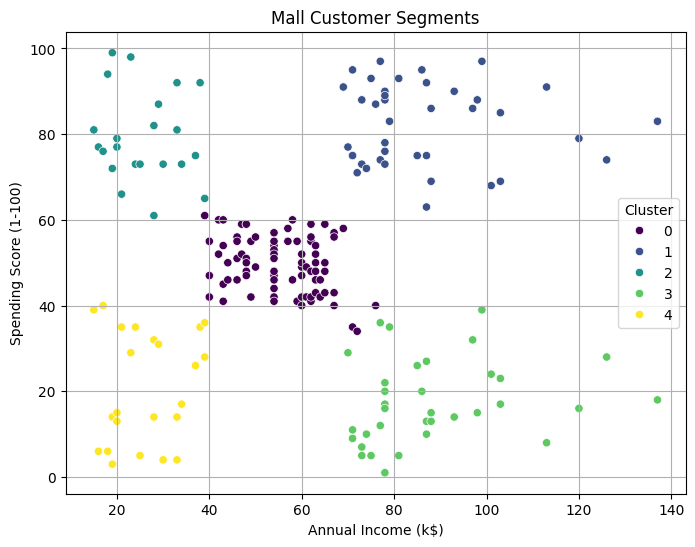

Task 2: Clustering Iris Dataset


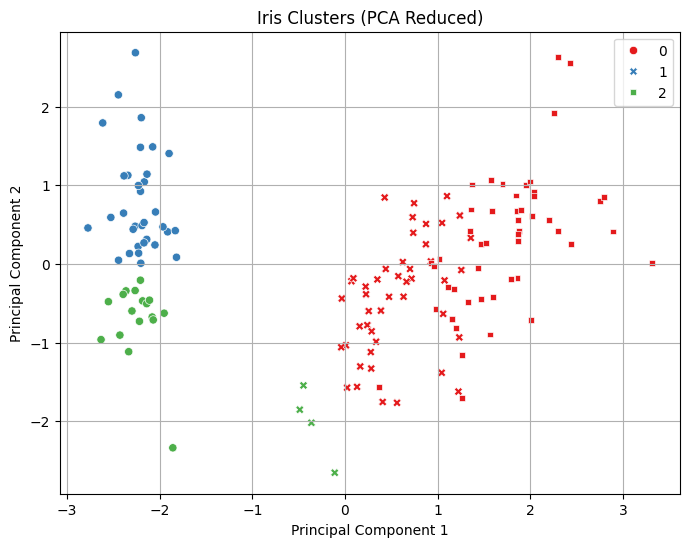

Task 3: Image Compression with K-Means


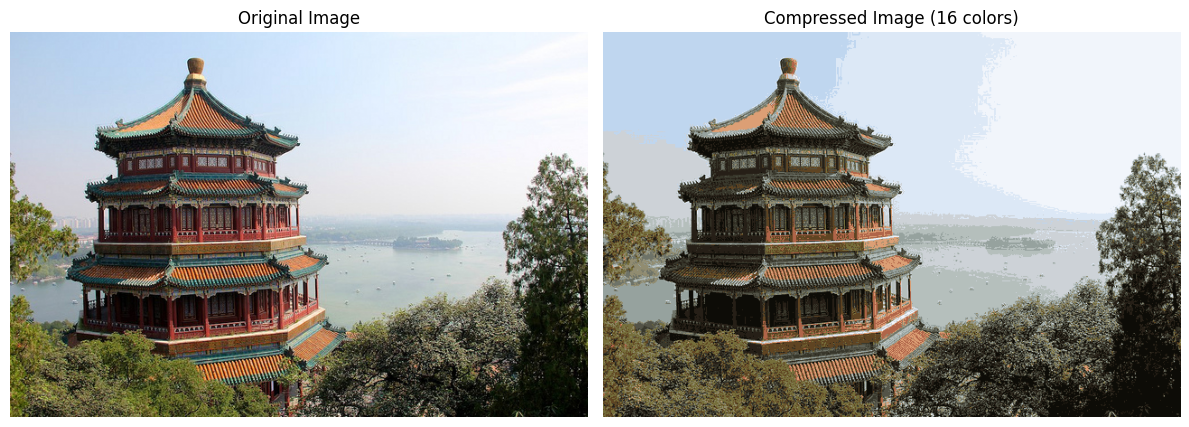

In [ ]:
#Title: Perform K-Means Clustering on a Dataset

# Task 1: Clustering Customer Data
# Objective: Cluster a dataset of customer purchases to identify customer segments.
# Dataset: Use a publicly available dataset like the "Mall Customer Segmentation Dataset."

# Task 2: Clustering Plant Species
# Objective: Group different plant species based on their attributes.
# Dataset: Use the "Iris" dataset from Scikit-learn.

# Task 3: Clustering for Image Compression
# Objective: Use K-Means clustering for image compression.
# Dataset: Choose a sample image from Scikit-learn’s datasets.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.datasets import load_iris, load_sample_image
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Task 1: Clustering Customer Data (with updated URL)
def cluster_mall_customers():
    print("Task 1: Clustering Mall Customers")
    url = "https://raw.githubusercontent.com/kennedykwangari/Mall-Customer-Segmentation-Data/refs/heads/master/Mall_Customers.csv"
    data = pd.read_csv(url)

    data.columns = [col.strip().lower().replace(' ', '_') for col in data.columns]
   
    X = data[['annual_income_(k$)', 'spending_score_(1-100)']]

    kmeans = KMeans(n_clusters=5, random_state=42)
    data['Cluster'] = kmeans.fit_predict(X)

    plt.figure(figsize=(8,6))
    sns.scatterplot(data=data, x='annual_income_(k$)', y='spending_score_(1-100)', hue='Cluster', palette='viridis')
    plt.title("Mall Customer Segments")
    plt.xlabel("Annual Income (k$)")
    plt.ylabel("Spending Score (1-100)")
    plt.grid(True)
    plt.show()

# Task 2: Clustering Plant Species
def cluster_iris_dataset():
    print("Task 2: Clustering Iris Dataset")
    iris = load_iris()
    X = iris.data
    y = iris.target

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    plt.figure(figsize=(8,6))
    sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, style=y, palette='Set1')
    plt.title("Iris Clusters (PCA Reduced)")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.grid(True)
    plt.show()

# Task 3: Image Compression using K-Means
def image_compression_kmeans():
    print("Task 3: Image Compression with K-Means")
    china = load_sample_image("china.jpg")
    image = np.array(china, dtype=np.float64) / 255.0
    w, h, d = image.shape
    image_array = image.reshape((w * h, d))

    n_colors = 16
    kmeans = KMeans(n_clusters=n_colors, random_state=42)
    kmeans.fit(image_array)

    compressed = kmeans.cluster_centers_[kmeans.labels_].reshape((w, h, d))

    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(image)
    ax[0].set_title("Original Image")
    ax[0].axis('off')

    ax[1].imshow(compressed)
    ax[1].set_title(f"Compressed Image ({n_colors} colors)")
    ax[1].axis('off')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    cluster_mall_customers()
    cluster_iris_dataset()
    image_compression_kmeans()
